In [1]:
import itertools
import pandas as pd
import numpy as np
import yaml
import seaborn as sns
import matplotlib.pyplot as plt

from lab import metrics

In [2]:
def load_data(config_path: str = "../config/config.yaml"):
    with open(config_path, mode="r") as configfile:
        config = yaml.safe_load(configfile)
        
    keys = list(itertools.product(config["classifiers"], ("quic", "tcp", "mixed"), range(config["n_repetitions"])))
    
    return pd.concat([
        pd.read_csv(f"../results/dataset-performance/{classifier}/predictions-{factor}-{rep:02d}.csv")
        for classifier, factor, rep in keys
    ], keys=keys, names=["classifier", "factor", "repetition"])

dataset = load_data()
display(dataset)

y_true        -1             0  \
classifier  factor repetition                                        
kfp         quic   0          0       -1.0  1.000000  0.000000e+00   
                              1       -1.0  1.000000  0.000000e+00   
                              2       -1.0  1.000000  0.000000e+00   
                              3       -1.0  1.000000  0.000000e+00   
                              4        0.0  0.000000  1.000000e+00   
...                                    ...       ...           ...   
varcnn-time mixed  19         5852    -1.0  1.000000  2.791545e-13   
                              5853    -1.0  0.999945  5.243250e-13   
                              5854    -1.0  0.999985  2.206301e-10   
                              5855    -1.0  0.997032  5.042385e-19   
                              5856    87.0  0.621732  4.577804e-11   

                                               1             2             3  \
classifier  factor repetition                                                  
kfp         quic   0          0     0.000000e+00  0.000000e+00  0.000000e+00   
                              1     0.000000e+00  0.000000e+00  0.000000e+00   
                              2     0.000000e+00  0.000000e+00  0.000000e+00   
                              3     0.000000e+00  0.000000e+00  0.000000e+00   
                              4     0.000000e+00  0.000000e+00  0.000000e+00   
...                                          ...           ...           ...   
varcnn-time mixed  19         5852  4.908883e-20  3.080820e-20  1.849805e-18   
                              5853  1.374108e-10  1.623721e-15  9.694640e-13   
                              5854  5.730543e-13  2.623434e-13  4.019542e-12   
                              5855  4.158484e-16  2.786370e-11  6.517399e-18   
                              5856  3.388174e-15  2.304324e-19  1.658265e-11   

                                               4             5             6  \
classifier  factor repetition                                                  
kfp         quic   0          0     0.000000e+00  0.000000e+00  0.000000e+00   
                              1     0.000000e+00  0.000000e+00  0.000000e+00   
                              2     0.000000e+00  0.000000e+00  0.000000e+00   
                              3     0.000000e+00  0.000000e+00  0.000000e+00   
                              4     0.000000e+00  0.000000e+00  0.000000e+00   
...                                          ...           ...           ...   
varcnn-time mixed  19         5852  1.336498e-18  1.913827e-15  4.488555e-20   
                              5853  5.460379e-17  2.334210e-15  7.132261e-15   
                              5854  1.288234e-16  4.210301e-15  2.755274e-19   
                              5855  1.907244e-24  5.677715e-15  1.140491e-21   
                              5856  1.110701e-15  6.581333e-11  6.508975e-19   

                                               7  ...            90  \
classifier  factor repetition                     ...                 
kfp         quic   0          0     0.000000e+00  ...  0.000000e+00   
                              1     0.000000e+00  ...  0.000000e+00   
                              2     0.000000e+00  ...  0.000000e+00   
                              3     0.000000e+00  ...  0.000000e+00   
                              4     0.000000e+00  ...  0.000000e+00   
...                                          ...  ...           ...   
varcnn-time mixed  19         5852  4.680615e-24  ...  3.345576e-20   
                              5853  1.658012e-14  ...  3.425395e-18   
                              5854  5.798400e-18  ...  3.075202e-16   
                              5855  2.371921e-08  ...  4.161182e-16   
                              5856  8.817220e-18  ...  7.990301e-14   

                                              91            92            93  \
classifier  factor repetition          

In [3]:
dataset_varcnn = pd.concat([
    dataset,
    ((dataset.loc[["varcnn-time"]] + dataset.loc[["varcnn-sizes"]].values) / 2).rename({"varcnn-time": "varcnn"})
]).drop(["varcnn-time", "varcnn-sizes"])

display(dataset_varcnn)

/home/jsmith/Projects/quic-traffic-analysis/env/lib/python3.7/site-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


y_true        -1             0  \
classifier factor repetition                                        
kfp        quic   0          0       -1.0  1.000000  0.000000e+00   
                             1       -1.0  1.000000  0.000000e+00   
                             2       -1.0  1.000000  0.000000e+00   
                             3       -1.0  1.000000  0.000000e+00   
                             4        0.0  0.000000  1.000000e+00   
...                                   ...       ...           ...   
varcnn     mixed  19         5852    -1.0  1.000000  1.635163e-13   
                             5853    -1.0  0.999972  2.621625e-13   
                             5854    -1.0  0.999978  1.110951e-10   
                             5855    -1.0  0.998516  2.521193e-19   
                             5856    87.0  0.310866  2.288902e-11   

                                              1             2             3  \
classifier factor repetition                                                  
kfp        quic   0          0     0.000000e+00  0.000000e+00  0.000000e+00   
                             1     0.000000e+00  0.000000e+00  0.000000e+00   
                             2     0.000000e+00  0.000000e+00  0.000000e+00   
                             3     0.000000e+00  0.000000e+00  0.000000e+00   
                             4     0.000000e+00  0.000000e+00  0.000000e+00   
...                                         ...           ...           ...   
varcnn     mixed  19         5852  2.670951e-17  1.540603e-20  9.249413e-19   
                             5853  6.870541e-11  8.118604e-16  4.847320e-13   
                             5854  4.899705e-13  1.311721e-13  2.009771e-12   
                             5855  2.079242e-16  1.393185e-11  3.258699e-18   
                             5856  1.694087e-15  1.726817e-19  8.291323e-12   

                                              4             5             6  \
classifier factor repetition                                                  
kfp        quic   0          0     0.000000e+00  0.000000e+00  0.000000e+00   
                             1     0.000000e+00  0.000000e+00  0.000000e+00   
                             2     0.000000e+00  0.000000e+00  0.000000e+00   
                             3     0.000000e+00  0.000000e+00  0.000000e+00   
                             4     0.000000e+00  0.000000e+00  0.000000e+00   
...                                         ...           ...           ...   
varcnn     mixed  19         5852  5.157651e-16  9.569200e-16  2.244306e-20   
                             5853  2.730190e-17  1.167105e-15  3.566130e-15   
                             5854  6.441175e-17  2.105152e-15  1.382311e-19   
                             5855  9.536218e-25  2.838857e-15  5.702453e-22   
                             5856  5.553507e-16  3.290667e-11  3.254488e-19   

                                              7  ...            90  \
classifier factor repetition                     ...                 
kfp        quic   0          0     0.000000e+00  ...  0.000000e+00   
                             1     0.000000e+00  ...  0.000000e+00   
                             2     0.000000e+00  ...  0.000000e+00   
                             3     0.000000e+00  ...  0.000000e+00   
                             4     0.000000e+00  ...  0.000000e+00   
...                                         ...  ...           ...   
varcnn     mixed  19         5852  1.187129e-15  ...  8.540978e-19   
                             5853  8.290062e-15  ...  1.712698e-18   
                             5854  3.769383e-18  ...  1.537603e-16   
                             5855  1.185960e-08  ...  2.080591e-16   
                             5856  4.408610e-18  ...  3.995150e-14   

                                             91            92            93  \
classifier factor repetition                                                  
kfp        q

In [4]:
def score(frame):
    y_true = frame["y_true"]
    
    classes = np.arange(-1, 100)
    predictions = frame.loc[:, [str(x) for x in range(-1, 100)]].values
    y_pred = classes[np.argmax(predictions, axis=1)]
    
    return pd.Series({
        "precision": metrics.rprecision_score(y_true, y_pred, ratio=20),
        "recall": metrics.recall_score(y_true, y_pred)
    })

scores = dataset_varcnn.groupby(["classifier", "factor", "repetition"]).apply(score)
display(scores)

precision  recall
classifier factor repetition                   
dfnet      mixed  0            0.476074   0.980
                  1            0.471621   0.970
                  2            0.500186   0.991
                  3            0.520638   0.985
                  4            0.531413   0.978
...                                 ...     ...
varcnn     tcp    15           0.993837   0.664
                  16           0.958953   0.962
                  17           1.000000   0.457
                  18           0.928876   0.968
                  19           0.994306   0.719

[240 rows x 2 columns]

,classifier,factor,repetition,metric,score
0,dfnet,mixed,0,precision,0.476074
1,dfnet,mixed,0,recall,0.980000
2,dfnet,mixed,1,precision,0.471621
3,dfnet,mixed,1,recall,0.970000
4,dfnet,mixed,2,precision,0.500186
...,...,...,...,...,...
475,varcnn,tcp,17,recall,0.457000
476,varcnn,tcp,18,precision,0.928876
477,varcnn,tcp,18,recall,0.968000
478,varcnn,tcp,19,precision,0.994306


Text(-5.949999999999996, 0.5, 'Recall Score')

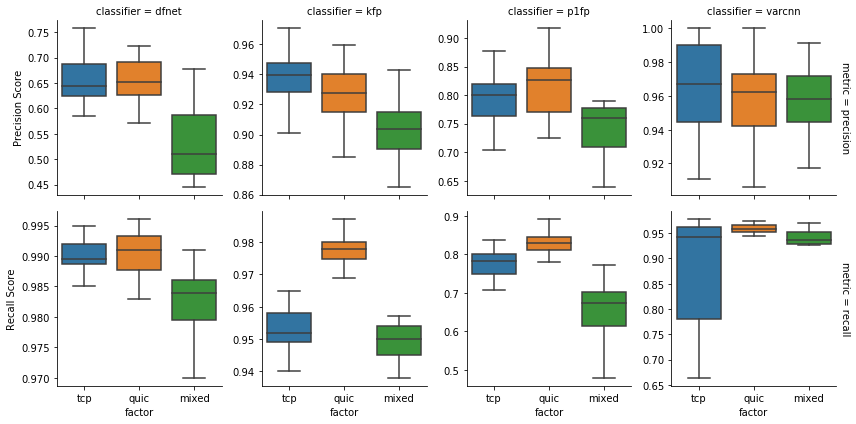

In [5]:
plot_data = scores.rename_axis("metric", axis=1).stack().rename("score").reset_index()
display(plot_data)
plot_data.to_csv("../results/dataset-performance/plot-data.csv", index=False, header=True)


grid = sns.catplot(x="factor", y="score", row="metric", col="classifier", data=plot_data,
                   kind="box", sharey=False, height=3, margin_titles=True,
                   order=["tcp", "quic", "mixed"], showfliers=False)
                  
grid.axes[0][0].set_ylabel("Precision Score")
grid.axes[1][0].set_ylabel("Recall Score")

# grid.savefig("../results/plots/dataset-comparison.pdf", bbox_inches="tight", dpi=150)